In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.io import wb
import datetime as dt

/usr/local/opt/pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/pandas/io/wb.py:19: FutureWarning: 
The pandas.io.wb module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [16]:
%matplotlib inline

In [55]:
f = wb.download(indicator='NY.GDP.MKTP.CD', country=['JP'],
                start=1960, end=2010)
f = f.unstack(level=0)
f.columns = ['GDP at market prices (current US$)']
f.head(2)

/usr/local/opt/pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/pandas/core/index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


,GDP at market prices (current US$)
year,
1960,4.430734e+10
1961,5.350862e+10


In [57]:
f2 = wb.download(indicator='SP.DYN.LE00.IN', country=['JP'],
                start=1960, end=2010)
f2 = f2.unstack(level=0)
f2.columns = ['Life expectancy at birth']
f2.head(2)

/usr/local/opt/pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/pandas/core/index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


,Life expectancy at birth
year,
1960,67.666098
1961,68.310000


In [58]:
f3 = wb.download(indicator='EN.ATM.CO2E.KT', country=['JP'],
                start=1960, end=2010)
f3 = f3.unstack(level=0)
f3.columns = ['CO2 emissions (kt)']
f3.head(2)

/usr/local/opt/pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/pandas/core/index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


,CO2 emissions (kt)
year,
1960,232781.160
1961,283118.069


In [59]:
f4 = pd.concat([f, f2], axis=1)
f4.head(3)

,GDP at market prices (current US$),Life expectancy at birth
year,,
1960,4.430734e+10,67.666098
1961,5.350862e+10,68.310000
1962,6.072302e+10,68.594878


In [60]:
import matplotlib.pyplot as plt

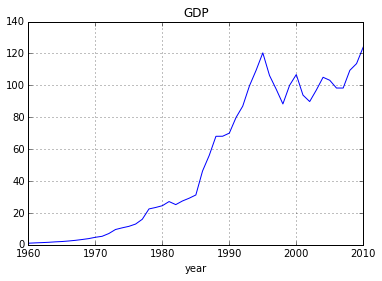

In [62]:
f4['GDP at market prices (current US$)'].plot(title='GDP', grid=True)

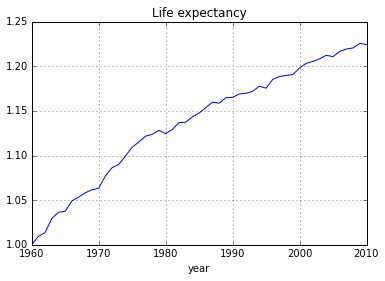

In [63]:
f4['Life expectancy at birth'].plot(title='Life expectancy', grid=True)

In [64]:
f5 = pd.concat([f, f3], axis=1)
f5.head(3)

,GDP at market prices (current US$),CO2 emissions (kt)
year,,
1960,4.430734e+10,232781.160
1961,5.350862e+10,283118.069
1962,6.072302e+10,293220.654


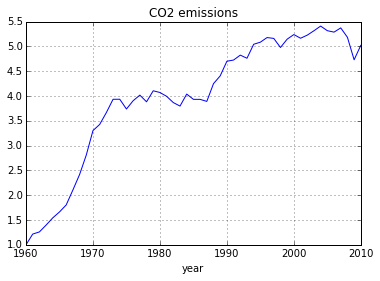

In [67]:
f5['CO2 emissions (kt)'].plot(title='CO2 emissions', grid=True)

In [68]:
GDP=f['GDP at market prices (current US$)']
LE=f2['Life expectancy at birth']
CO2=f3['CO2 emissions (kt)']

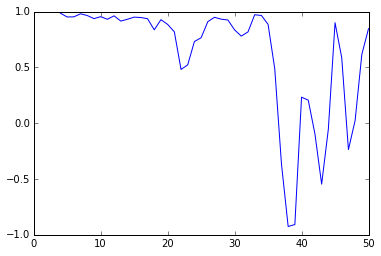

In [69]:
roll_cor=pd.rolling_corr(GDP, LE, window=5)

plt.plot(roll_cor)
plt.show()

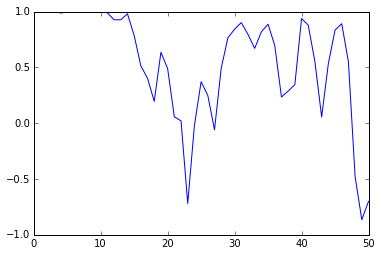

In [70]:
roll_cor2=pd.rolling_corr(GDP, CO2, window=5)

plt.plot(roll_cor2)
plt.show()

In [71]:
f6 = pd.concat([roll_cor, roll_cor2], axis=1)

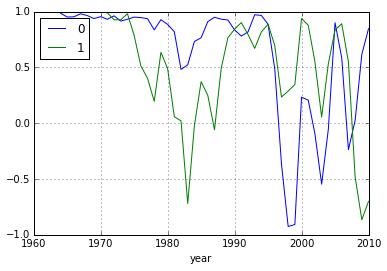

In [72]:
f6.plot(grid=True)